## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME', 'USE_CASE', 'ORGANIZATION', 'STATUS', 'SPECIAL_CONSIDERATIONS', 'ASK_AMT'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,INCOME_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,0,1
1,T3,Independent,C2000,1-9999,1
2,T5,CompanySponsored,C3000,0,0
3,T3,CompanySponsored,C2000,10000-24999,1
4,T3,Independent,C1000,100000-499999,1
...,...,...,...,...,...
34294,T4,Independent,C1000,0,0
34295,T4,CompanySponsored,C3000,0,0
34296,T3,CompanySponsored,C2000,0,0
34297,T5,Independent,C3000,0,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION      71
INCOME_AMT           9
IS_SUCCESSFUL        2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
type_counts = application_df['APPLICATION_TYPE'].value_counts()
type_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(type_counts[type_counts < 10].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
T12         27
T2          16
Other       11
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_type = application_df['CLASSIFICATION'].value_counts()
classification_type

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classifications_cleaned = classification_type.loc[classification_type > 1]
classifications_cleaned

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_type[classification_type < 2000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: count, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_data = pd.get_dummies(application_df)
numeric_data.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,CLASSIFICATION_Other,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2,0,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,False
3,1,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [10]:
# Split our preprocessed data into our features and target arrays
y = numeric_data['IS_SUCCESSFUL'].values
X = numeric_data.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [26]:
# Define the model - Model 4 (72% Accuracy)
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation = "sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 80)             │         2,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           610 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,121 (31.72 KB)

 Trainable params: 8,121 (31.72 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6835 - loss: 0.6159
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7221 - loss: 0.5738
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7226 - loss: 0.5714
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7300 - loss: 0.5639
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7243 - loss: 0.5704
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7224 - loss: 0.5702
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7239 - loss: 0.5677
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7356 - loss: 0.5582
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7265 - loss: 0.5662
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7308 - loss: 0.5616
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7317 - loss: 0.5603
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━━

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 2ms/step - accuracy: 0.7248 - loss: 0.5660
Loss: 0.5660281777381897, Accuracy: 0.724781334400177


<Axes: >

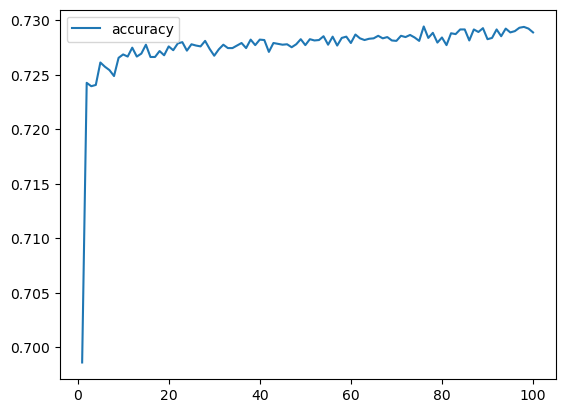

In [16]:
#plot the accuracy
accuracy_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
accuracy_df.plot(y = 'accuracy')

In [17]:
# Export our model to HDF5 file
save_model = nn.save('/Models/AlphabetSoupCharity_model_4.h5')

In [29]:
# Define the model - Model 5 (72% Accuracy)
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 60

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 80)             │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,131 (23.95 KB)

 Trainable params: 6,131 (23.95 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6714 - loss: 0.6189
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.7228 - loss: 0.5730
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.7277 - loss: 0.5638
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.7262 - loss: 0.5648
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7261 - loss: 0.5658
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.7266 - loss: 0.5664
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.7239 - loss: 0.5675
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7278 - loss: 0.5632
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.7251 - loss: 0.5659
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - accuracy: 0.7291 - loss: 0.5649
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.7293 - loss: 0.5629
Epoch 12/100
804/804 ━━━

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 3ms/step - accuracy: 0.7240 - loss: 0.5707
Loss: 0.5707262754440308, Accuracy: 0.7239649891853333


<Axes: >

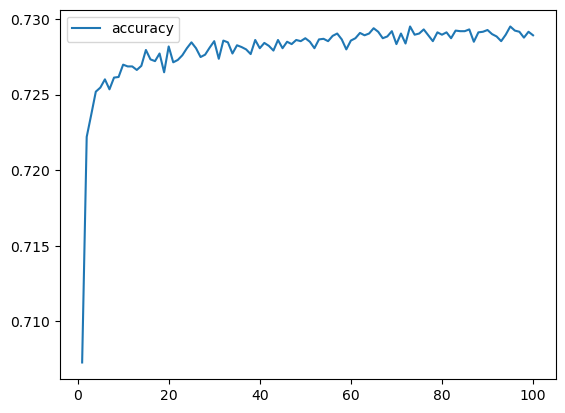

In [33]:
#plot the accuracy
accuracy_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
accuracy_df.plot(y = 'accuracy')

In [34]:
# Export our model to HDF5 file
save_model = nn.save('/Models/AlphabetSoupCharity_model_5.h5')